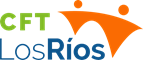
### Curso: Big Data
#### Clase IV - Analisis de grandes volumenes de datos en Python
#### Profesor: Diego Miranda
#### Data Scientist

## Función merge de pandas permite unir diferentes datasets en base a una columna

In [1]:
# cargamos la libreria pandas, que permite abrir archivos de datos
import pandas as pd

# cargando la data 1
data1 = pd.read_csv('school_data_1.csv')

data1.head()

,person_id,school_id,summercamp,female,parental_schooling,parental_lincome,test_year_5,test_year_6
0,1,5,0,1,10.0,12.939209,NaN,1.636284
1,2,14,1,0,11.0,14.737391,1.297036,2.561449
2,3,7,1,0,14.0,16.083261,2.761908,3.526002
3,4,8,0,0,12.0,14.608081,1.772913,2.381062
4,5,9,1,0,11.0,13.756785,1.180356,1.959818


In [2]:
# Dimension del dataset, contiene 202.231 filas y 917 columnas
data1.shape

(3491, 8)

In [3]:
# Entrega resumenes estadisticos
data1.describe()

,person_id,school_id,summercamp,female,parental_schooling,parental_lincome,test_year_5,test_year_6
count,3491.000000,3491.000000,3491.000000,3491.000000,3486.000000,3491.000000,3485.000000,3486.000000
mean,1746.000000,15.655686,0.458894,0.515325,11.324727,14.562807,2.258909,2.517411
std,1007.909222,8.674339,0.498379,0.499837,1.104628,0.693530,0.684667,0.720642
min,1.000000,1.000000,0.000000,0.000000,10.000000,12.667598,-0.269616,0.282411
25%,873.500000,8.000000,0.000000,0.000000,11.000000,14.115008,1.799708,2.007090
50%,1746.000000,15.000000,0.000000,1.000000,11.000000,14.520815,2.258287,2.449218
75%,2618.500000,23.000000,1.000000,1.000000,12.000000,14.946971,2.715426,3.018490
max,3491.000000,30.000000,1.000000,1.000000,23.000000,19.449821,4.689652,4.983078


In [4]:
# Muestra el tipo de columna que contiene el dataset
data1.dtypes

person_id               int64
school_id               int64
summercamp              int64
female                  int64
parental_schooling    float64
parental_lincome      float64
test_year_5           float64
test_year_6           float64
dtype: object

In [5]:
# Valores perdidos
data1.isnull().sum()

person_id             0
school_id             0
summercamp            0
female                0
parental_schooling    5
parental_lincome      0
test_year_5           6
test_year_6           5
dtype: int64

In [6]:
# Imputamos los valores NaN mediante el promedio
data1["parental_schooling"] = data1["parental_schooling"].fillna(data1["parental_schooling"].mean())
data1["test_year_5"] = data1["test_year_5"].fillna(data1["test_year_5"].mean())
data1["test_year_6"] = data1["test_year_6"].fillna(data1["test_year_6"].mean())
# Comprobamos los valores NaN
data1.isnull().sum()

person_id             0
school_id             0
summercamp            0
female                0
parental_schooling    0
parental_lincome      0
test_year_5           0
test_year_6           0
dtype: int64

In [7]:
# cargando la data 2

data2 = pd.read_stata('school_data_2.dta')


data2.head()

,person_id,letter
0,1,0.0
1,2,0.0
2,3,0.0
3,4,0.0
4,5,0.0


In [8]:
data2.shape

(3491, 2)

In [9]:
data2.isnull().sum()

person_id    0
letter       0
dtype: int64

In [10]:
# unimos los 2 dataesets con la función .merge de pandas

school_data = pd.merge(data1, data2, on='person_id')

school_data.head()

,person_id,school_id,summercamp,female,parental_schooling,parental_lincome,test_year_5,test_year_6,letter
0,1,5,0,1,10.0,12.939209,2.258909,1.636284,0.0
1,2,14,1,0,11.0,14.737391,1.297036,2.561449,0.0
2,3,7,1,0,14.0,16.083261,2.761908,3.526002,0.0
3,4,8,0,0,12.0,14.608081,1.772913,2.381062,0.0
4,5,9,1,0,11.0,13.756785,1.180356,1.959818,0.0


In [11]:
school_data.shape

(3491, 9)

In [12]:
# Cargando el dataset 3

data3 = pd.read_excel('school_data_3.xlsx')

data3.head()

,person_id,test_year_2,test_year_3,test_year_4,test_year_7,test_year_8,test_year_9,test_year_10,learnings,school_id
0,1,1.090117,1.914594,2.065805,2.377697,2.032904,1.493803,1.880512,10.236394,5
1,2,1.246309,1.154470,1.582455,1.747376,2.444041,1.663050,1.833769,8.278911,14
2,3,2.726472,2.269011,3.247252,3.017764,3.361646,3.387020,2.968617,8.966529,7
3,4,2.693032,2.413203,1.479452,2.637954,3.021940,2.761513,2.088086,8.876466,8
4,5,1.660545,1.828067,1.361972,1.904636,2.109774,2.285818,1.845694,8.770518,9


In [13]:
data3.shape

(3491, 10)

In [14]:
data3.isnull().sum()

person_id       0
test_year_2     0
test_year_3     0
test_year_4     0
test_year_7     0
test_year_8     0
test_year_9     0
test_year_10    0
learnings       0
school_id       0
dtype: int64

In [15]:
# Unimos los datasets
data = pd.merge(school_data, data3, on='person_id')
data.head()

,person_id,school_id_x,summercamp,female,parental_schooling,parental_lincome,test_year_5,test_year_6,letter,test_year_2,test_year_3,test_year_4,test_year_7,test_year_8,test_year_9,test_year_10,learnings,school_id_y
0,1,5,0,1,10.0,12.939209,2.258909,1.636284,0.0,1.090117,1.914594,2.065805,2.377697,2.032904,1.493803,1.880512,10.236394,5
1,2,14,1,0,11.0,14.737391,1.297036,2.561449,0.0,1.246309,1.154470,1.582455,1.747376,2.444041,1.663050,1.833769,8.278911,14
2,3,7,1,0,14.0,16.083261,2.761908,3.526002,0.0,2.726472,2.269011,3.247252,3.017764,3.361646,3.387020,2.968617,8.966529,7
3,4,8,0,0,12.0,14.608081,1.772913,2.381062,0.0,2.693032,2.413203,1.479452,2.637954,3.021940,2.761513,2.088086,8.876466,8
4,5,9,1,0,11.0,13.756785,1.180356,1.959818,0.0,1.660545,1.828067,1.361972,1.904636,2.109774,2.285818,1.845694,8.770518,9


In [16]:
data.shape

(3491, 18)

In [17]:
data.describe()

,person_id,school_id_x,summercamp,female,parental_schooling,parental_lincome,test_year_5,test_year_6,letter,test_year_2,test_year_3,test_year_4,test_year_7,test_year_8,test_year_9,test_year_10,learnings,school_id_y
count,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000
mean,1746.000000,15.655686,0.458894,0.515325,11.324727,14.562807,2.258909,2.517411,0.246921,2.224587,2.254009,2.249515,2.444453,2.450573,2.453095,2.454057,10.063569,15.655686
std,1007.909222,8.674339,0.498379,0.499837,1.103837,0.693530,0.684078,0.720125,0.431282,0.676501,0.674030,0.682811,0.742760,0.738015,0.739265,0.736627,1.279010,8.674339
min,1.000000,1.000000,0.000000,0.000000,10.000000,12.667598,-0.269616,0.282411,0.000000,-0.570077,-0.463976,0.014251,0.031388,-0.185596,-0.245648,-0.304286,5.386084,1.000000
25%,873.500000,8.000000,0.000000,0.000000,11.000000,14.115008,1.800735,2.007486,0.000000,1.771236,1.817996,1.782818,1.937678,1.927651,1.937140,1.941455,9.180964,8.000000
50%,1746.000000,15.000000,0.000000,1.000000,11.000000,14.520815,2.258909,2.450493,0.000000,2.237744,2.248572,2.249468,2.368546,2.388875,2.386815,2.377569,10.041026,15.000000
75%,2618.500000,23.000000,1.000000,1.000000,12.000000,14.946971,2.715041,3.017581,0.000000,2.664371,2.715288,2.709033,2.972072,2.959604,2.986067,2.969251,10.958777,23.000000
max,3491.000000,30.000000,1.000000,1.000000,23.000000,19.449821,4.689652,4.983078,1.000000,4.737349,4.388531,4.349952,4.771106,5.045062,4.656483,4.929489,14.620796,30.000000


In [18]:
data.isna().sum()

person_id             0
school_id_x           0
summercamp            0
female                0
parental_schooling    0
parental_lincome      0
test_year_5           0
test_year_6           0
letter                0
test_year_2           0
test_year_3           0
test_year_4           0
test_year_7           0
test_year_8           0
test_year_9           0
test_year_10          0
learnings             0
school_id_y           0
dtype: int64

In [19]:
# creamos una columna con el promedio de todas las columnas test_year
# Creamos una columna con el promedio de todas las columnas test_year
data['mean_test'] = data[['test_year_5', 'test_year_6', 'test_year_2',
                          'test_year_3', 'test_year_4', 
                          'test_year_7', 'test_year_8',
                          'test_year_9', 'test_year_10']].mean(axis=1)

data.head()

,person_id,school_id_x,summercamp,female,parental_schooling,parental_lincome,test_year_5,test_year_6,letter,test_year_2,test_year_3,test_year_4,test_year_7,test_year_8,test_year_9,test_year_10,learnings,school_id_y,mean_test
0,1,5,0,1,10.0,12.939209,2.258909,1.636284,0.0,1.090117,1.914594,2.065805,2.377697,2.032904,1.493803,1.880512,10.236394,5,1.861181
1,2,14,1,0,11.0,14.737391,1.297036,2.561449,0.0,1.246309,1.154470,1.582455,1.747376,2.444041,1.663050,1.833769,8.278911,14,1.725551
2,3,7,1,0,14.0,16.083261,2.761908,3.526002,0.0,2.726472,2.269011,3.247252,3.017764,3.361646,3.387020,2.968617,8.966529,7,3.029521
3,4,8,0,0,12.0,14.608081,1.772913,2.381062,0.0,2.693032,2.413203,1.479452,2.637954,3.021940,2.761513,2.088086,8.876466,8,2.361017
4,5,9,1,0,11.0,13.756785,1.180356,1.959818,0.0,1.660545,1.828067,1.361972,1.904636,2.109774,2.285818,1.845694,8.770518,9,1.792964


In [20]:
top_10_alumnos = data.nlargest(10, 'mean_test')
print(top_10_alumnos)

      person_id  school_id_x  summercamp  female  parental_schooling  \
201         202            8           1       1                22.0   
3327       3328           27           1       1                20.0   
2166       2167            5           1       0                16.0   
1762       1763           17           1       0                13.0   
2815       2816            3           1       1                15.0   
2129       2130           30           1       0                23.0   
1977       1978           24           1       1                13.0   
3018       3019           16           1       0                15.0   
1012       1013           19           1       0                13.0   
1837       1838            4           1       1                13.0   

      parental_lincome  test_year_5  test_year_6  letter  test_year_2  \
201          18.927711     4.245332     4.983078     0.0     4.377575   
3327         18.802415     3.635844     4.449545     0.0     

In [21]:
# Calculamos la mediana de la columna mean_test
median_mean_test = data['mean_test'].median()
print(f"La mediana de 'mean_test' es: {median_mean_test}")

La mediana de 'mean_test' es: 2.3066067688717857


In [22]:
# Calculamos el promediode la columna mean_test
mean_mean_test = data['mean_test'].mean()
print(f"La mediana de 'mean_test' es: {mean_mean_test}")

La mediana de 'mean_test' es: 2.36740088636884


In [23]:
data.describe()

,person_id,school_id_x,summercamp,female,parental_schooling,parental_lincome,test_year_5,test_year_6,letter,test_year_2,test_year_3,test_year_4,test_year_7,test_year_8,test_year_9,test_year_10,learnings,school_id_y,mean_test
count,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000
mean,1746.000000,15.655686,0.458894,0.515325,11.324727,14.562807,2.258909,2.517411,0.246921,2.224587,2.254009,2.249515,2.444453,2.450573,2.453095,2.454057,10.063569,15.655686,2.367401
std,1007.909222,8.674339,0.498379,0.499837,1.103837,0.693530,0.684078,0.720125,0.431282,0.676501,0.674030,0.682811,0.742760,0.738015,0.739265,0.736627,1.279010,8.674339,0.621059
min,1.000000,1.000000,0.000000,0.000000,10.000000,12.667598,-0.269616,0.282411,0.000000,-0.570077,-0.463976,0.014251,0.031388,-0.185596,-0.245648,-0.304286,5.386084,1.000000,-0.015720
25%,873.500000,8.000000,0.000000,0.000000,11.000000,14.115008,1.800735,2.007486,0.000000,1.771236,1.817996,1.782818,1.937678,1.927651,1.937140,1.941455,9.180964,8.000000,1.939394
50%,1746.000000,15.000000,0.000000,1.000000,11.000000,14.520815,2.258909,2.450493,0.000000,2.237744,2.248572,2.249468,2.368546,2.388875,2.386815,2.377569,10.041026,15.000000,2.306607
75%,2618.500000,23.000000,1.000000,1.000000,12.000000,14.946971,2.715041,3.017581,0.000000,2.664371,2.715288,2.709033,2.972072,2.959604,2.986067,2.969251,10.958777,23.000000,2.797893
max,3491.000000,30.000000,1.000000,1.000000,23.000000,19.449821,4.689652,4.983078,1.000000,4.737349,4.388531,4.349952,4.771106,5.045062,4.656483,4.929489,14.620796,30.000000,4.434690


## Uso de funciones

In [24]:
# Creamos una columna que clasifique a los alumnos en reprobado y aprobado
# primero debemos crear una función

# Definir la función que clasificará a los alumnos
def clasificar_alumno(puntuacion):
    if puntuacion >= 1.8:
        return 'Aprobado'
    else:
        return 'Reprobado'

# Aplicar la función a la columna 'mean_test' para crear una nueva columna 'status'
data['final'] = data['mean_test'].apply(clasificar_alumno)
data.head()

,person_id,school_id_x,summercamp,female,parental_schooling,parental_lincome,test_year_5,test_year_6,letter,test_year_2,test_year_3,test_year_4,test_year_7,test_year_8,test_year_9,test_year_10,learnings,school_id_y,mean_test,final
0,1,5,0,1,10.0,12.939209,2.258909,1.636284,0.0,1.090117,1.914594,2.065805,2.377697,2.032904,1.493803,1.880512,10.236394,5,1.861181,Aprobado
1,2,14,1,0,11.0,14.737391,1.297036,2.561449,0.0,1.246309,1.154470,1.582455,1.747376,2.444041,1.663050,1.833769,8.278911,14,1.725551,Reprobado
2,3,7,1,0,14.0,16.083261,2.761908,3.526002,0.0,2.726472,2.269011,3.247252,3.017764,3.361646,3.387020,2.968617,8.966529,7,3.029521,Aprobado
3,4,8,0,0,12.0,14.608081,1.772913,2.381062,0.0,2.693032,2.413203,1.479452,2.637954,3.021940,2.761513,2.088086,8.876466,8,2.361017,Aprobado
4,5,9,1,0,11.0,13.756785,1.180356,1.959818,0.0,1.660545,1.828067,1.361972,1.904636,2.109774,2.285818,1.845694,8.770518,9,1.792964,Reprobado


In [25]:
# Creamos una columna que clasifique el nivel de ingreso de los padres
data['parental_lincome'].describe()

count    3491.000000
mean       14.562807
std         0.693530
min        12.667598
25%        14.115008
50%        14.520815
75%        14.946971
max        19.449821
Name: parental_lincome, dtype: float64

In [26]:
def clasificar_ingreso(ingreso):
    if ingreso < 15:
        return 'Bajo'
    elif ingreso < 18:
        return 'Medio'
    else:
        return 'Alto'

data['nivel_ingreso'] = data['parental_lincome'].apply(clasificar_ingreso)
data.head()

,person_id,school_id_x,summercamp,female,parental_schooling,parental_lincome,test_year_5,test_year_6,letter,test_year_2,...,test_year_4,test_year_7,test_year_8,test_year_9,test_year_10,learnings,school_id_y,mean_test,final,nivel_ingreso
0,1,5,0,1,10.0,12.939209,2.258909,1.636284,0.0,1.090117,...,2.065805,2.377697,2.032904,1.493803,1.880512,10.236394,5,1.861181,Aprobado,Bajo
1,2,14,1,0,11.0,14.737391,1.297036,2.561449,0.0,1.246309,...,1.582455,1.747376,2.444041,1.663050,1.833769,8.278911,14,1.725551,Reprobado,Bajo
2,3,7,1,0,14.0,16.083261,2.761908,3.526002,0.0,2.726472,...,3.247252,3.017764,3.361646,3.387020,2.968617,8.966529,7,3.029521,Aprobado,Medio
3,4,8,0,0,12.0,14.608081,1.772913,2.381062,0.0,2.693032,...,1.479452,2.637954,3.021940,2.761513,2.088086,8.876466,8,2.361017,Aprobado,Bajo
4,5,9,1,0,11.0,13.756785,1.180356,1.959818,0.0,1.660545,...,1.361972,1.904636,2.109774,2.285818,1.845694,8.770518,9,1.792964,Reprobado,Bajo


In [27]:
def clasificar_contexto_familiar(escolaridad, ingreso):
    if escolaridad >= 17 and ingreso > 15:
        return 'Apoyo bajo'
    elif escolaridad <= 15 and ingreso < 18:
        return 'Apoyo medio'
    else:
        return 'Apoyo alto'


data['contexto_familiar'] = data.apply(lambda row: clasificar_contexto_familiar(row['parental_schooling'], 
                                                                                row['parental_lincome']), 
                                       axis=1)

data.head()

,person_id,school_id_x,summercamp,female,parental_schooling,parental_lincome,test_year_5,test_year_6,letter,test_year_2,...,test_year_7,test_year_8,test_year_9,test_year_10,learnings,school_id_y,mean_test,final,nivel_ingreso,contexto_familiar
0,1,5,0,1,10.0,12.939209,2.258909,1.636284,0.0,1.090117,...,2.377697,2.032904,1.493803,1.880512,10.236394,5,1.861181,Aprobado,Bajo,Apoyo medio
1,2,14,1,0,11.0,14.737391,1.297036,2.561449,0.0,1.246309,...,1.747376,2.444041,1.663050,1.833769,8.278911,14,1.725551,Reprobado,Bajo,Apoyo medio
2,3,7,1,0,14.0,16.083261,2.761908,3.526002,0.0,2.726472,...,3.017764,3.361646,3.387020,2.968617,8.966529,7,3.029521,Aprobado,Medio,Apoyo medio
3,4,8,0,0,12.0,14.608081,1.772913,2.381062,0.0,2.693032,...,2.637954,3.021940,2.761513,2.088086,8.876466,8,2.361017,Aprobado,Bajo,Apoyo medio
4,5,9,1,0,11.0,13.756785,1.180356,1.959818,0.0,1.660545,...,1.904636,2.109774,2.285818,1.845694,8.770518,9,1.792964,Reprobado,Bajo,Apoyo medio


## Visualización de datos utilizando la librería Plotly

In [29]:
import plotly.express as px

In [43]:
fig = px.bar(data.groupby('contexto_familiar')['mean_test'].mean().reset_index(), 
             x='contexto_familiar', 
             y='mean_test', 
             title='Rendimiento Medio por Contexto Familiar',
             labels={'contexto_familiar': 'Contexto Familiar', 'mean_test': 'Rendimiento Medio'})
fig.show()


In [44]:
# Histograma de frecuencias
px.histogram(data, x='mean_test', color='final',
                   title='Distribución de Rendimiento Académico',
                   labels={'mean_test': 'Rendimiento Académico', 'final': 'Resultado Final'})


In [40]:
px.scatter(data, x='parental_schooling', y='mean_test', color='female',
                 title='Relación entre educación de los padres y la nota promedio del alumno')

In [41]:
px.box(data, x='female', y='mean_test', points="all", 
             title='Distribución de Mean Test por Género')

In [46]:
px.box(data, x='final', y='parental_lincome',
             color='final',
             title='Distribución de Ingreso Parental por Resultado Final',
             labels={'final': 'Resultado Final', 'parental_lincome': 'Ingreso Parental'})

In [47]:
px.pie(data, names='nivel_ingreso',
             title='Proporción de Estudiantes por Nivel de Ingreso',
             labels={'nivel_ingreso': 'Nivel de Ingreso'})



In [49]:
# Asumiendo que cada 'test_year_X' corresponde a un año consecutivo, calculamos el promedio por año
years = ['test_year_2', 'test_year_3', 'test_year_4', 'test_year_5',
         'test_year_6', 'test_year_7', 'test_year_8', 'test_year_9', 'test_year_10']
mean_performance_by_year = data[years].mean()

fig = px.line(x=years, y=mean_performance_by_year, 
              title='Evolución del Rendimiento Académico a lo Largo de los Años',
              labels={'x': 'Año', 'y': 'Rendimiento Académico Promedio'})
fig.show()


In [51]:
# Este es un ejemplo hipotético, asumiendo que tienes una forma de agrupar por años
data['year'] = np.random.choice(['2019', '2020', '2021', '2022'], size=len(data))
performance_by_context_and_year = data.groupby(['year', 'contexto_familiar'])['mean_test'].mean().reset_index()

fig = px.area(performance_by_context_and_year, x='year', y='mean_test', color='contexto_familiar',
              title='Rendimiento Académico por Contexto Familiar a lo Largo del Tiempo',
              labels={'mean_test': 'Rendimiento Académico Promedio', 'year': 'Año'})
fig.show()
